<a href="https://colab.research.google.com/github/nytakesobi/Kalokhina_pract3/blob/main/pract3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as plt
from google.colab import files
uploaded = files.upload()

Saving spotify-2023.csv to spotify-2023.csv


In [2]:
df = pd.read_csv('spotify-2023.csv', encoding = 'latin-1')
print(df)

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

In [3]:
df = pd.read_csv('spotify-2023.csv', encoding="latin-1")
df['streams'] = pd.to_numeric(df['streams'], errors='coerce', downcast='integer')
top_10_films = df.sort_values(by='streams', ascending=False).head(10)

Завдання полягає в тому, щоб побудувати горизонтальну стовпчикову діаграму, на якій відображаються 10 найпопулярніших пісень на Spotify у 2023 році за кількістю прослуховувань.

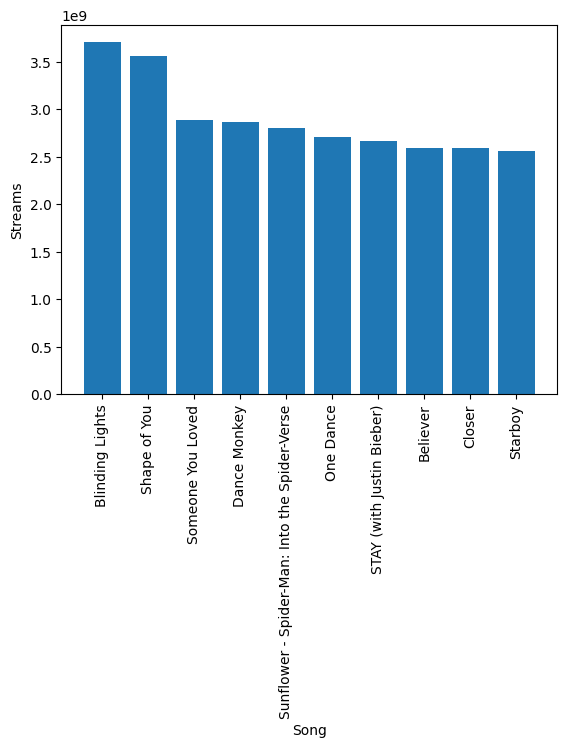

In [4]:
import matplotlib.pyplot as plt
plt.bar(top_10_films['track_name'], top_10_films['streams'])
plt.xlabel('Song')
plt.ylabel('Streams')
# plt.title('Top 10 Most Streamed Spotify Songs')
plt.xticks(rotation=90)
plt.show()

Розподіл жанрів найпопулярніших пісень: Створіть кругову діаграму або секторну діаграму, яка відображає розподіл жанрів серед найпопулярніших пісень у 2023 році.

Text(0.5, 1.0, 'Most Popular song mode by Views')

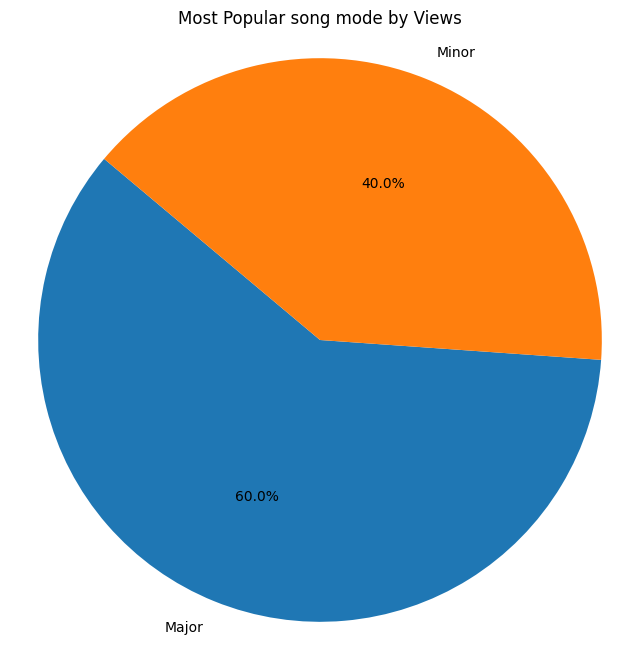

In [5]:
genre_views = df.groupby('mode')['streams'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(genre_views['streams'], labels=genre_views['mode'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Most Popular song mode by Views')

Динаміка популярності треку в залежності від часу: Побудуйте лінійний графік, який відображає зміни кількості прослуховувань певного треку протягом року 2023 року.

Оскільки в датасеті не були надані дані про зміну кількості прослуховувань то я змінила задачу на побудобу кругової діаграми, що відображає популярність треку на різних платформах (deeyer?charts, applemusic?charts)

Text(0.5, 1.0, 'Song A Platform Distribution')

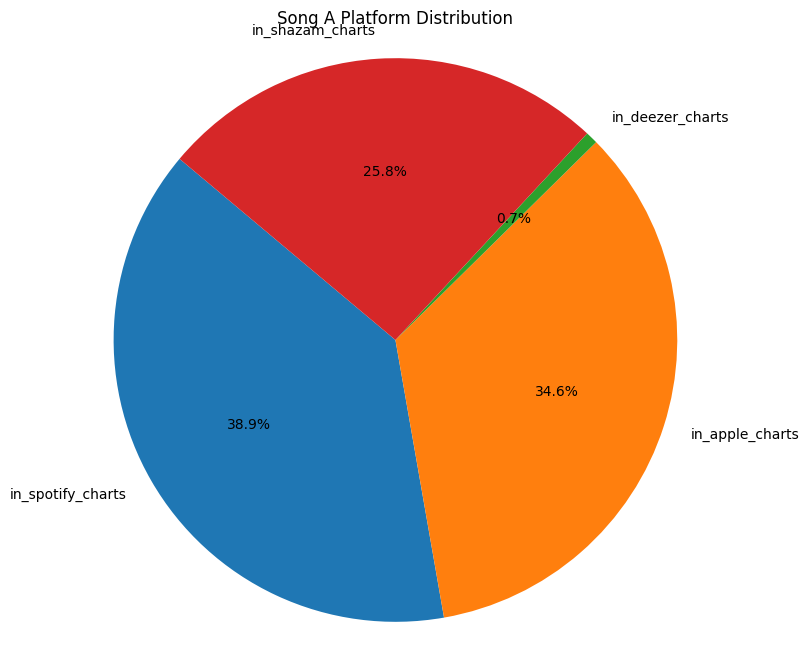

In [6]:
song_data = df[df['track_name'] == 'I Wanna Be Yours'][['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']]
plt.figure(figsize=(8, 8))
plt.pie(song_data.iloc[0], labels=song_data.columns, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Song A Platform Distribution')

Рейтинг артистів на Spotify: Створіть стовпчикову діаграму, на якій відображаються 10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів.

Порівняння популярності трьох треків: Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість прослуховувань трьох конкретних треків у 2023 році.

In [ ]:
df2 = pd.DataFrame()
col_art = df.columns.get_loc('artist(s)_name')
for index, row in df.iterrows():
  row = df.iloc[index]
  artists = row["artist(s)_name"]
  separate_artists = artists.split(',')
  for artist in separate_artists:
    row['artist(s)_name'] = artist
    df2 = df2.append(row)
    #df2 = pd.concat([df2] + [row], ignore_index=True)
df2.reset_index(drop=True, inplace=True)


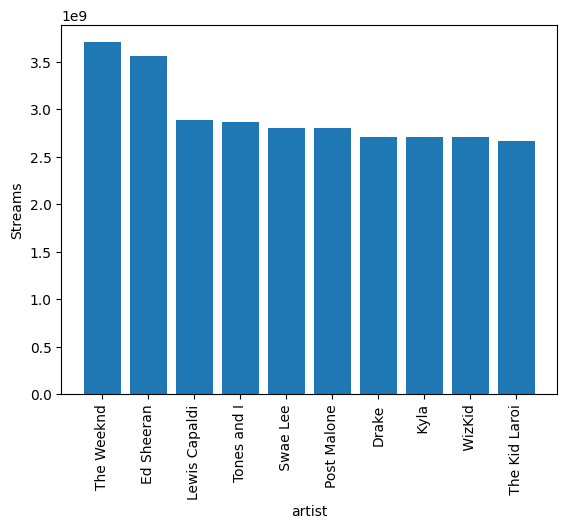

In [8]:
artist_views = df2.groupby('artist(s)_name')['streams'].sum().reset_index()
top_10_singer = df2.sort_values(by='streams', ascending=False).head(10)
plt.bar(top_10_singer['artist(s)_name'], top_10_singer['streams'])
plt.xlabel('artist')
plt.ylabel('Streams')
plt.xticks(rotation=90)
plt.show()

In [9]:
artist_views

,artist(s)_name,streams
0,,1.877726e+08
1,070 Shake,7.166451e+08
2,21 Savage,4.038535e+09
3,2Pac,5.793951e+08
4,347aidan,1.608453e+08
...,...,...
798,girl in red,7.230439e+08
799,j-hope,2.723956e+08
800,sped up 8282,1.037625e+08
801,sped up nightcore,2.070333e+08


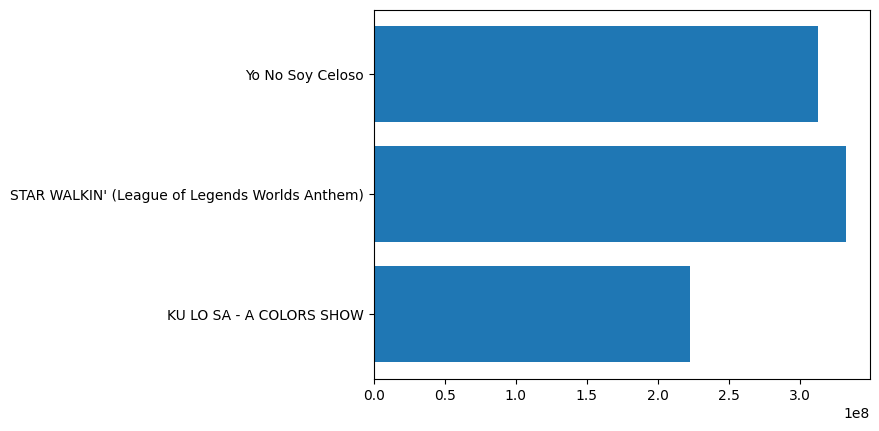

In [11]:
import random
import matplotlib.pyplot as plt

x = df.iloc[random.sample(range(1, 952), 3)]
plt.barh(x["track_name"].values, x["streams"].values)
plt.show()
